<style>
div.cell, div.text_cell_render{
  max-width:760px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 130%;
  }

.rendered_html li
{
  line-height: 1.;
  }

.rendered_html h1, h2 {
  font-familly:"Charis SIL", serif;
}

img { 
    max-width: 200% !important;
    height: auto !important;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas, monospace;
  font-size: 120%;
}
</style>

<div class="frontmatter text-center">
<h1> MATH5027 Scientific Python</h1>
<h3>Central European University, Fall 2017/2018</h3>
<h3>Instructor: Prof. Roberta Sinatra, TA: Johannes Wachs</h3>
inspired to a lecture of James Bagrow, http://bagrow.com.
</div>


### Today's plan:

- Brief exploration of parts of the [Python standard library](http://docs.python.org/2/library/):
    - random
    - datetime
- A brief introduction to **plotting** with [matplotlib](http://matplotlib.org) - we will do more in one of the next classes:
    - Coin flips run statistics 

### Standard library

#### Random stuff

Python has a great random package. This lets us do stochastic simulations by giving us a pseudorandom number generator.

The function below gives you access to random floats between zero and one:

In [2]:
import random

for _ in range(4): # underscore makes a handy dummy variable
    print(random.random())

0.35003529616234863
0.5087577999239443
0.6728639146227645
0.3994797129691058


Suppose you want to make random samples from a list. Normally you'd code up something like:

In [3]:
import random
suit = ["hearts", "diamonds", "clubs","spades"]

# sample w replacement four times:
for _ in range(4): # _ is a dumb variable, just a way to iterate 
    r = random.random()*len(suit) # r in [0,4)
    print(suit[ int(r) ])
    

spades
clubs
spades
hearts


But this code is not very pretty. Can we do better? Yep:

In [4]:
for _ in range(4):
    print(random.choice(suit)) # Random has a function choice :)

spades
diamonds
spades
spades


In [4]:
random.choice?

And don't forget our fancy list comprehensions:

In [5]:
draws = [ random.choice(suit) for _ in range(4) ]
print(draws)

['hearts', 'diamonds', 'clubs', 'hearts']


There are also functions for random integers, normally-distributed random variables, and more. 

*** 


Let's talk about two more functions from ```random```,  `sample` and `shuffle`:


If we run `random.choice` on a list repeatedly we are sampling uniformly from that list **with replacement**. If we want to sample without replacement, meaning the same element cannot be selected more than once, we can use `random.sample`:

In [6]:
numbers = range(1000)
print(random.sample( numbers, 5)) # make five draws

[705, 490, 612, 807, 708]


We already covered sorting data. Sometimes we may want to take some data and put it into a random order. This is easy with **shuffle**:

In [7]:
speech = """We choose to go to the moon. We choose to go to 
the moon in this decade, not because it is easy, but because
it is hard."""

list_words = speech.split() # split on any whitespace and
                            # remove empty strings

print(list_words)


['We', 'choose', 'to', 'go', 'to', 'the', 'moon.', 'We', 'choose', 'to', 'go', 'to', 'the', 'moon', 'in', 'this', 'decade,', 'not', 'because', 'it', 'is', 'easy,', 'but', 'because', 'it', 'is', 'hard.']


In [8]:
random.shuffle(list_words) # shuffle works in place!!!
print(list_words)

['the', 'to', 'not', 'this', 'because', 'We', 'moon', 'choose', 'it', 'in', 'it', 'moon.', 'to', 'to', 'is', 'because', 'is', 'hard.', 'We', 'to', 'easy,', 'decade,', 'go', 'choose', 'go', 'but', 'the']


**IMPORTANT**: if you make a copy of a list like below, you are doing just a shallow copy!

In [9]:
second_list=list_words #shallow copy

It means that if you modify ``list_words`` you also modify second_list. See foe example below

In [10]:
random.shuffle(second_list) # shuffle works in place!!!
print(second_list)
print(list_words)


['is', 'moon', 'choose', 'hard.', 'decade,', 'go', 'because', 'it', 'but', 'moon.', 'this', 'it', 'is', 'in', 'to', 'not', 'because', 'easy,', 'the', 'go', 'to', 'choose', 'to', 'the', 'We', 'We', 'to']
['is', 'moon', 'choose', 'hard.', 'decade,', 'go', 'because', 'it', 'but', 'moon.', 'this', 'it', 'is', 'in', 'to', 'not', 'because', 'easy,', 'the', 'go', 'to', 'choose', 'to', 'the', 'We', 'We', 'to']


Sometimes we want to have an independent copy of a list. In that case we need to do a **``deep copy``**:

In [11]:
import copy
third_list=copy.deepcopy(list_words)
random.shuffle(third_list)
print(third_list)
print(list_words)

['not', 'to', 'is', 'it', 'moon.', 'it', 'in', 'because', 'because', 'the', 'choose', 'easy,', 'moon', 'hard.', 'go', 'this', 'decade,', 'to', 'to', 'choose', 'We', 'is', 'but', 'We', 'go', 'to', 'the']
['is', 'moon', 'choose', 'hard.', 'decade,', 'go', 'because', 'it', 'but', 'moon.', 'this', 'it', 'is', 'in', 'to', 'not', 'because', 'easy,', 'the', 'go', 'to', 'choose', 'to', 'the', 'We', 'We', 'to']


# Plotting with Matplotlib

* [Matplotlib](http://matplotlib.org) is a powerful 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.

One of the key features of matplotlib is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. This makes matplotlib highly suitable for generating figures for scientific publications. 

More information at the Matplotlib web page: http://matplotlib.org/ . There's a [nice gallery](http://matplotlib.org/gallery.html) worth checking out. 
We will have more examples of matplotlib in future classes, when using numpy and do more data examples.

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. 

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB. We first need to import matplotlib and pyplot:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline

In [2]:
x = range(0, 10)
y = [i ** 2 for i in x]

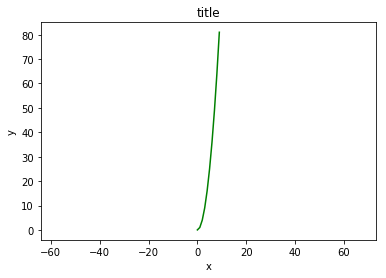

In [3]:
# If you have used matlab, you'll realize that we are using the same commands, just preceded by plt.
plt.figure()
plt.plot(x, y, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.axis('equal');

Most of the plotting related functions in MATLAB are covered by matplotlib. For example, subplot and color/symbol selection:

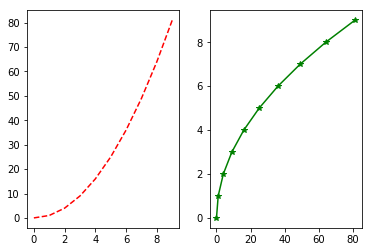

In [20]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots. 

However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.

Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global. The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline

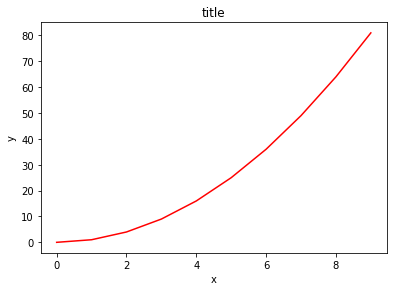

In [3]:
x = range(0, 10)
y = [i ** 2 for i in x]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1). In Jupyter notebook the first two 
        # parameters are not important as the bottom left corenr is always located at the same place. 

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

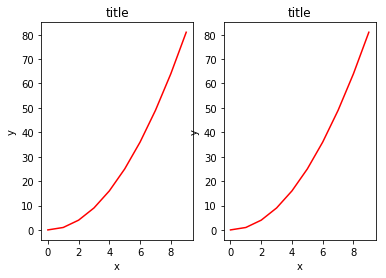

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2) # nrows specifies the number of rows you want, ncols how many figures in each row 

for ax in axs:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

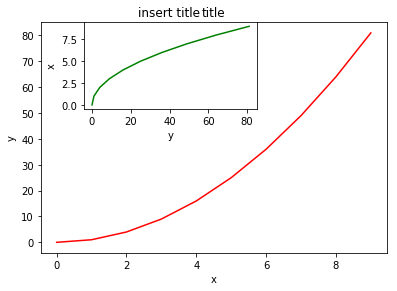

In [29]:
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.1, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title ');

### Saving figures
To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [20]:
fig.savefig("filename.png", dpi=200)

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

**BTW**, API means "Application Programming Interface" and is a set of functions and procedures that allow the creation of applications which access the features or data of an operating system, application, or other service. In this case, the APIs allow you to create figure without needing to specify pixel by pixel, or object by object what you want to see on screen, write in a file, and so on.

# Example and hand-on

OK, let's do something *slightly* more interesting. Let's use `matplotlib` to visualize the run statistics for a biased coin.

<img src="https://sciencelens.files.wordpress.com/2012/06/coin_flip_s.jpg" alt="coin flips" style="width: 200px;">


Let's flip a coin 1000 times, where $p$ is the probability the coin lands on *H*:

In [30]:
import random
p = 0.7

# Flip the coin 1000 times:
flips = []
while len(flips) < 1000:
    if random.random() < p:
        flips.append("H")
    else:
        flips.append("T")

print(flips[:20])

['H', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H']


***
### Quick Exercise 
Create the list flips with a one-liner
***

In [44]:
import random
p = 0.6
flips = []
flips = ["H" if random.random() < p else "T" for _ in range(1000)]
print(flips[:20])

['H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H']


We want to count how many times we see 5 heads in a row, 6 in a row, etc.:

1. Convert the list of `H`'s and `T`'s into a single string `HHTHHHTH...`.
2. Split that string into a list of substrings whenever there's a `T`.
3. Count how long each non-empty string is.
4. Count how many times we see each value from 3.

In [45]:
# step 1
S = "".join( flips ) # join each flip by an empty delimiter
print(S[:50])

HHTHHHHHHTHHTTTTHTTHHTTHHHTHHHTHHHHTTTTHTHHTHHHTTH


In [48]:
# step 2
heads_runs = S.split("T")
print(heads_runs[:20])

['HH', 'HHHHHH', 'HH', '', '', '', 'H', '', 'HH', '', 'HHH', 'HHH', 'HHHH', '', '', '', 'H', 'HH', 'HHH', '']


In [47]:
# step 3
run_lengths = [ len(run) for run in heads_runs if run ] ## figure out what "if run" does...
print(run_lengths[:8])

[2, 6, 2, 1, 2, 3, 3, 4]


In [49]:
# step 4 (cheating with a python counter)
from collections import Counter
run2count = Counter(run_lengths) # Counter() acts like a dict
print (run2count)

Counter({1: 98, 2: 54, 3: 44, 4: 19, 6: 13, 5: 10, 9: 3, 7: 3, 11: 2})


**Whew!** Now we've got our _run statistics_. We will take a look at them using a plot, but first...

***
### Exercise
* What type of variable is run2count? Can you do casting?
* Write code to create a dictionary like run2count, without using Counter
***

Ok, let's do some simple statistics and plot:

In [26]:
# split run and count into separate lists:
run_count = run2count.items() # You know what this does, right?
print (run_count)

run,count = zip(*run_count) 
print (run,count)

dict_items([(1, 73), (2, 38), (3, 38), (5, 23), (4, 19), (9, 2), (6, 11), (10, 5), (8, 5), (14, 1), (7, 3), (12, 1), (13, 1)])
(1, 2, 3, 5, 4, 9, 6, 10, 8, 14, 7, 12, 13) (73, 38, 38, 23, 19, 2, 11, 5, 5, 1, 3, 1, 1)


***
### Quick exercise
The command ```zip(*run_counts)``` converts a list of tuples into lists containing the elements of the tuples. Get a better grip on it by checking the type of run_count, of zip(\*run_count) and by displaying the content of each one.
***

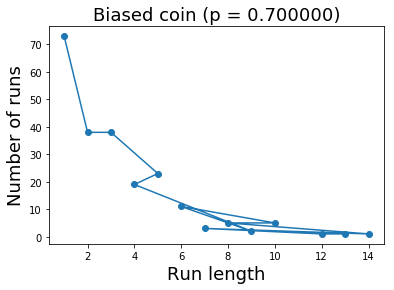

In [27]:
fig, axes = plt.subplots()
axes.plot( run, count, 'o-' )

axes.set_xlabel("Run length", fontsize=18)
axes.set_ylabel("Number of runs", fontsize=18)
axes.set_title("Biased coin (p = %f)" % p, fontsize=18);


## What the heck is this?
Oh, right, we forgot the dictionaries are not sorted!! Let's fix it.

In [28]:
# split run and count into separate lists:
run_count_sorted=sorted(run2count.items(), key=lambda x: x[0])
run,count = zip(*run_count_sorted) 
print (run,count)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14) (73, 38, 38, 19, 23, 11, 3, 5, 2, 5, 1, 1, 1)


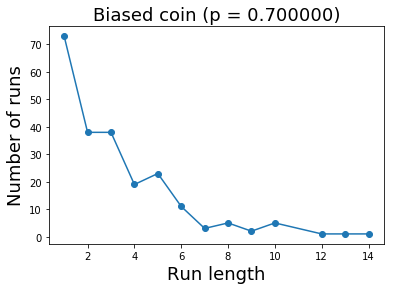

In [29]:
fig, axes = plt.subplots()
axes.plot( run, count, 'o-' )

axes.set_xlabel("Run length", fontsize=18)
axes.set_ylabel("Number of runs", fontsize=18)
axes.set_title("Biased coin (p = %f)" % p, fontsize=18);


***
## Exercise
* Take the logarithms of the number of runs and plot that vs run length
_Note_: writing ```log(count)``` will return an error. The goal of the exercise is to find the solution to this :)
* Use ```semilogy``` to put the y-axis in a log scale
* Figure out how to plot the x-axis in log scale, then both axes.

***
In this case, a line plot may not make much sense, since can't have a run of length 2.5. Let's do a vertical bar chart instead:

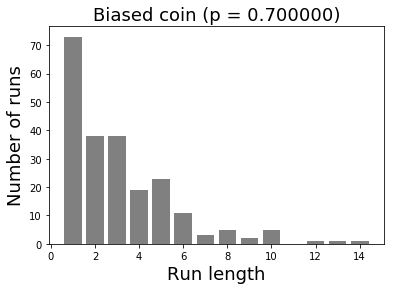

In [30]:
#Hey, I am using the Matlab-like API here... did you notice? What is the difference?
plt.bar( run, count, fc="gray" ) # Look, here we are using another way of plotting! 
plt.xlabel("Run length", fontsize=18)
plt.ylabel("Number of runs", fontsize=18)
plt.title("Biased coin (p = %f)" % p, fontsize=18)
plt.show() # Try to comment this line and see what happens!

The data is a little noisy. We only did 1000 flips; do the exercise below to see how much smoother it can get.

## Exercises
* Reproduce a histogram like the one above, based on 10^5 coin flips.
* Use a different color for the bars (Hey, you can use also [ Color Hex](http://www.color-hex.com/) codes)
* Use a fair coin (not biased). Remember to change the details in the figure accordingly ;) 
* Add a legend to the plot. This is done by using the command legend and by passing a list of strings.

*** 
Instead of flipping a coin, say you roll a fair 6-faces die many times. Count how many times you see the same number in a row (no matter which number). For example, if you have: `16622232211`, you have two runs of length 1, three of length 2, and one of length 3. Create a *Number of runs vs number of lengths plot*, as done in the exercise above.

***
Create a plot made of two subplots, where you represent the *Number of runs vs number of lengths plot* for a 6-face die on the left, and for a 8-face die on the right.

***

### Dealing with dates and times

Timestamps can be surprisingly tricky to deal with in programs. For example:

* How many days are between April 21, 1986 and today?

To answer this properly, you need full information on the calendar, including leap years. And don't get started on **time zones**.

### Datetime

Fortunately, python has [builtin support for date and time data](http://docs.python.org/2/library/datetime.html). It's not trivial to use but it works.

Let's answer the above question. `datetime` gives us useful date objects, `date`, `time`, and `datetime`. These let us store a date, a time of day, or both, respectively.

In [4]:
import datetime

D1 = datetime.date(1986, 4, 21)
T1 = datetime.time(12,0,0) # noon
DT = datetime.datetime(1986, 4, 21, 12, 15, 0)

# Typically you want to work with datetime because you can
# omit the time values and then it defaults to midnight.
D = datetime.datetime(1986,4,21)

Once you have a `datetime` object you can do fancy things with it:

In [7]:
print("The year was %i and the day is %i." % (D.year, D.day))

print ("The day of the week was %i." % (D.weekday()))
print ("(Monday = 0, ..., Sunday = 6.)")

The year was 1986 and the day is 21.
The day of the week was 0.
(Monday = 0, ..., Sunday = 6.)


In [3]:
Dnow = datetime.datetime.now()
print(Dnow)

2017-10-10 16:41:37.329950


We can format the time using for example strftime (all information about the format [ here](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)):

In [11]:
#Dnow.strftime("%I:%M%p") 
Dnow.strftime("Date: %Y-%m-%d time: %H:%M") 

'Date: 2017-10-10 time: 16:41'

More importantly, these objects support math operations that are meaningful for time:

In [35]:
print (Dnow - D)

11490 days, 15:10:17.652889


What this does is create another data object, called a `timedelta` object:

In [36]:
dt = Dnow - D
print(type(dt))
print("There are %i days between then and now." % dt.days)

<class 'datetime.timedelta'>
There are 11490 days between then and now.


`timedelta` encodes time intervals. This allow us to do more operations:

In [16]:
interval = datetime.timedelta(days=100,hours=12) # 100.5 days

soon = datetime.datetime.now() + interval # addition!

interval_days =interval.days #if you want also the .5, need to hack a bit and do interval.total_seconds()/3600.0/24

print ("In %0.1f days it will be %s." % (interval_days, soon))


In 100.0 days it will be 2018-01-19 05:21:31.208562.


OK, the real work comes when reading and writing **timestamps**. We need to be able to understand how `2012-04-26` incorporates a date in the same way that `April 26, 2012` does.

`datetime` provides us tools to read and write such timestamps. Let's first define two different timestamps and a timedelta

In [38]:
ts1 = "2012-04-26"
ts2 = "January 5, 1978"

We can now use a function to parse a string for a time given a string representing a time format. This uses a function called strptime (read it as "**str**ing **p**arse" **time**"). 

Here we go.

In [39]:
d1 = datetime.datetime.strptime( ts1, "%Y-%m-%d" )
print(d1)
print(d1 + datetime.timedelta(days=-7))

2012-04-26 00:00:00
2012-04-19 00:00:00


The string `"%Y-%m-%d"` encodes the timestamp format we were looking for. A four-digit year (`%Y`), a dash (`-`), a two-digit month number (`%m`), another dash, and then a day number (`%d`).

Now ts2 incorporates the name of a month, so that format string is a little different (`%B` means the full month name).

In [40]:
d2 = datetime.datetime.strptime( ts2, "%B %d, %Y" )
print(d2)
print(d2 - datetime.timedelta(days=-7))

1978-01-05 00:00:00
1978-01-12 00:00:00


There's a huge number of ways to build a format string. Best is to look up the documentation: http://docs.python.org/2/library/datetime.html#strftime-strptime-behavior

Parallel to strptime is another function, `strftime` (string format time) that does the opposite: it takes a `date` or `datetime` and returns a timestamp format string.

In [42]:
s_before = "Jan 19, '89"
d = datetime.datetime.strptime("Jan 19, '89", "%b %d, '%y") # taking the time in a specific format as input
s_after  = d.strftime("%Y-%m-%d") # writing the time in another format
print (s_before, "--->", s_after)

Jan 19, '89 ---> 1989-01-19


Datetime is extremely useful, because different data sources encode times in different ways. Some formats are easy for humans to read, but I like the standard `%Y-%m-%d %H:%M:%S` UNIX-style timestamp because it _sorts nicely_.

## Exercise
* Write a Python program to subtract five days from current date
* Write a Python program to add 5 seconds with current time
* Write a Python program to get a list of dates between two dates

In [34]:
# Substract 5 days from current data
Most = datetime.datetime.now()
print("Now:", Most.strftime("%Y-%b-%d"))
Earlier = Most - datetime.timedelta(days = 5)
print("Earlier:",Earlier.strftime("%Y-%b-%d"))

Now: 2017-Oct-10
Earlier: 2017-Oct-05


In [37]:
print(Most.strftime("%H:%M:%S"))
Later = Most + datetime.timedelta(seconds = 5)
print(Later.strftime("%H:%M:%S"))

17:34:24
17:34:29


In [49]:
beginning = datetime.datetime.strptime("2017-01-03", "%Y-%m-%d" )
end = datetime.datetime.strptime("2017-01-28", "%Y-%m-%d" )

timestep = datetime.timedelta(days=1)
actual = beginning
while actual < end:
    actual = actual + timestep
    print(datetime.datetime.strftime(actual, "%Y-%m-%d"))

2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09
2017-01-10
2017-01-11
2017-01-12
2017-01-13
2017-01-14
2017-01-15
2017-01-16
2017-01-17
2017-01-18
2017-01-19
2017-01-20
2017-01-21
2017-01-22
2017-01-23
2017-01-24
2017-01-25
2017-01-26
2017-01-27
2017-01-28


##### ASIDE: The epoch.

Sometimes you see a date that looks weird:

In [50]:
import time # another time module!

print(time.time()) # what the heck!

1507650828.428299


This function is another way to get the _current time_ but it's encoded in numeric format: **the number of seconds since the epoch**. Let's explore:

In [48]:
t = time.time()
y = t / 60 / 60 / 24 / 365 # oops, leap years!
print(y)

47.793286132196314


OK, what the heck happened back then?

In [49]:
days_delta = time.time() / 60 / 60 / 24
print (datetime.datetime.now() - datetime.timedelta(days=days_delta))

1970-01-01 02:00:00.000054


The epoch ("epoch" means "reference date") is the [UNIX epoch](http://en.wikipedia.org/wiki/Unix_time), Jan 1, 1970.

* `time.time()` returns the number of seconds since 00:00:00 Coordinated Universal Time (UTC), Thursday, 1 January 1970, not counting leap seconds.

Why 1970? Because of these guys:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="https://upload.wikimedia.org/wikipedia/commons/8/8f/Ken_Thompson_(sitting)_and_Dennis_Ritchie_at_PDP-11_(2876612463).jpg" alt="Dennis Ritchie and Ken Thompson" style="width: 500px;">


These numeric timestamp formats were very useful when it was too expensive to have a complex library like `datetime`.

### Exercise
* Calculate the difference in days between the unix Epoch and your birthdate

In [3]:
import datetime, time
Now = datetime.datetime.now()
birth = datetime.datetime(1971,3,31)
db = Now - birth
dbdays = db.days
t = time.time()
print("Universal time now:", t)
#print("There are %i days between then and now." % db.days)
print("Universal time on March 31, 1971:",t - 60*60*24*dbdays)

Universal time now: 1508162620.0231912
Universal time on March 31, 1971: 39276220.02319121
